In [64]:

mainQuery= {
    "greeting": ["Hi", "Hello", "How are you?"],
    "covid": ["covid", "covid-19", "covid19", "sars-cov"],
    "tuberculosis": ['tuberculosis', 'tb'],
    "asthma" : ["asthma"],
    "nocontext": [""],
    "endNote": ["Thank you", "This was helpful!", "See you later!"]
}
context1 = {
    "diagnosis":["if i have", "if he has", "if she has", "if they have", "diagnosis"],
    "medications": ["treatment", "medications", "medicine"],
    "types":["types", "variants", "stages"],
    "facts":["what is that?","tell me", "when did", "what happens"],
    "nocontext":[""]
}

context2= {
    "sideeffects":["side effects", "careful", "effects"],
    "preparation":["preparation", "prepare for", "requirements"],
    "duration": ["how long", "duration"],
    "nocontext":[""]
}

actions= {
    "greeting": ["Hello"],
    "asthmaDef": ["Asthma Definition"],
    "covidDef": ["Covid Definition"],
    "tbDef": ["Covid Definition"],
    "endNote": ["Thanks for chatting"],
    "covidDiag":["PCR Test"],
    "asthmaDiag":["Asthma Diagnosis"],
    "tbDiag":["Tb diagnosis"],
    "noContext": ["Sorry didnt Understand the question. please specify in details"],
    "covidvariants": ["covid variants"],
    "ashtmavariants": ["asthma variants"],
    "tbvariants":["Tb variants"],
    "covidMeds": ["covidMedications"],
    "tbMeds": ["Tb meds"],
    "asthmaMeds":["asthma meds"],
    "unrelated": ["sorry I can only answer for question I am allowed to."],
    "nocontext":[""]

}


In [65]:
diseaseaseContext="nocontext"
contexta="nocontext"
contextb="nocontext"
def getContext(text, prevContext):
    text=text.lower()
    keys= list(prevContext)
    for key in mainQuery:
        for keyword in mainQuery[key]:
            if keyword.lower() in text:
                if key=="nocontext":
                    continue
                keys[0]=key
                break
        else:
            continue
        break
    for key in context1:
        for keyword in context1[key]:
            if keyword.lower()  in text:
                if key=="nocontext":
                    continue
                keys[1]=key
                break
        else:
            continue
        break
    for key in context2:
        for keyword in context2[key]:
            if keyword.lower()  in text:
                if key=="nocontext":
                    continue
                keys[2]=key
                break
        else:
            continue
        break
    return (keys[0], keys[1], keys[2])


In [66]:
states= list()
for key in sorted(mainQuery):
    for context in sorted(context1):
        for  intent in sorted(context2):
            states.append((key,context, intent))
print(states[7])

('asthma', 'facts', 'sideeffects')


In [67]:
print (len(states))
print (len(actions))



120
17


In [68]:
import numpy as np

#set up  mapping and inverse mapping to find corresponeding state or number
numbertoState=dict()
statetoNumber=dict()
for i,state in enumerate(states):
    numbertoState[i]= state
    statetoNumber[state]=i
numbertoAction=dict()
actiontoNumber=dict()
for i,action in enumerate(actions):
    numbertoAction[i]= action
    actiontoNumber[action]=i



In [69]:
#reward map----- old state to new state reward
reward= np.zeros((len(states), len(states)),dtype=float)
print(reward.shape)
# since we know we have to somehow end the convo. lets set maximum reward if the next state is ending the convo
for i,lastState in enumerate(states):
    for j,nextState in enumerate(states):
        if "endNote" in nextState:
            reward[i][j] =1


(120, 120)


In [70]:
qTable= np.zeros((len(states), len(actions)), dtype=float)
with open('test.npy','rb')as f:
    f.seek(0)
    loadedFile=np.load(f ,allow_pickle=False)
    if loadedFile.shape== qTable.shape:
        pass
        qTable=loadedFile
        print("Loaded old backup")

Qtable Training

In [71]:
import random
#start q learn algo
# Initialize parameters
gamma = 0.75 # Discount factor 
alpha = 0.9 # Learning rate 
epsilon = 0.1
next_stateIndex=0
stateIndex=0
actionNumber=0
episodeRun=True
reward=0

prevContext= ("nocontext", "nocontext", "nocontext")
prevState=statetoNumber[prevContext]
while episodeRun:

    text=input("")
    state=getContext(text, numbertoState[prevState])
    stateIndex=statetoNumber[state]

    next_max = np.max(qTable[stateIndex])
    
    old_value = qTable[prevState][actionNumber]
    print(old_value)
    new_value=(1 - alpha) * old_value + alpha * (reward + gamma * next_max)
    
    qTable[prevState][actionNumber] = new_value

    prevState=stateIndex
    print(numbertoState[stateIndex])

    if np.random.uniform(0, 1) < epsilon:
            actionNumber = random.randint(0,len(actions))# Explore action space
    else:
            actionNumber= np.argmax(qTable[stateIndex]) # Exploit learned values

    print(actions[numbertoAction[actionNumber]])
        
    feedback=input("Helpful Y/N? or Quit Q").lower()
    if feedback=='y':
        reward=1
    elif feedback=='n':
        reward=-1
    else:
        episodeRun=False

#print(qTable)


0.0
('greeting', 'nocontext', 'nocontext')
['Hello']
0.0
('covid', 'nocontext', 'nocontext')
['Hello']
0.0
('covid', 'nocontext', 'nocontext')
['Hello']
0.0
('covid', 'nocontext', 'nocontext')
['Hello']


Text(0.5, 1.0, 'Matplotlib PLot NumPy Array')

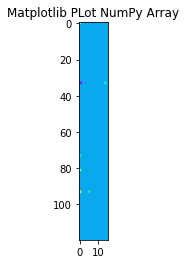

In [ ]:
#plot the map to see differences
import matplotlib.pyplot as plt
plt.imshow( qTable, cmap = 'rainbow' , interpolation = 'bilinear')
plt.title("Matplotlib PLot NumPy Array") 

In [ ]:
with open('test.npy', 'wb') as f:
    np.save(f, qTable)

In [ ]:
print (qTable[33])
print(numbertoState[33])
print(numbertoAction[np.argmax(qTable[33])])
print(statetoNumber[("nocontext","nocontext","nocontext")])

[-0.9        -0.9         0.32378078 -0.39170777  0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          2.08750911  0.        ]
('covid', 'nocontext', 'nocontext')
asthmaMeds
93
